In [ ]:
import torch
from PIL import Image
from pathlib import Path
from fastai.basics import *
from fastai.vision.data import *
from fastai.vision.all import *
from fastai.text.all import *

In [ ]:
path=Path('./danbooru2020')
image_path=path/'512px/'
meta=path/'meta'

In [ ]:
with open('named_tags.pkl','rb') as f: named_tags=pickle.load(f)
with open('id_tags.pkl','rb') as f: id_tags=pickle.load(f)
full_table = pd.read_pickle('fulll_table.pkl')

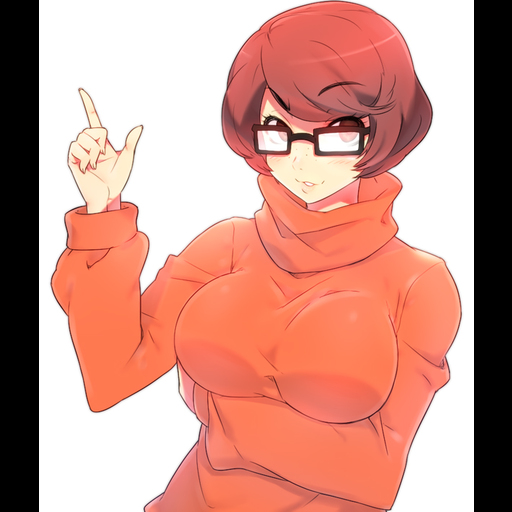

In [ ]:
Image.open(Path('danbooru2020/512px/0000/1000000.jpg'))

In [ ]:
class df_text(Transform):
    def __init__(self,table):
        self.table=table
    def encodes(self,path):
        file_id=int(self._get_file_id(path))
        tags=L(list(full_table[full_table.id==file_id].tags.item()))
        return tags.map(lambda x:id_tags[x])
    def _get_file_id(self,path):
        return re.compile(r'(\d+).jpg').sub(r'\1',path.name)
    def decodes(self,o):
        return TitledStr(' '.join(o))

In [ ]:
label_func=lambda x:1

In [ ]:
for i,d in enumerate(dls.train):
    print(d[1][0])
    if i > 3: break

TensorText([   21,    25,    27,     5,   365,    30,    32, 12985,   421,    12,
          113,   477,   129, 33265,    37,   198,    39,   149,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1],
       device='cuda:0')
TensorText([   21, 50339,   539,    27,   945,   490,  1578, 39669,   159,   106,
          109,    32,   196,    12,  2400,  2401,    48,    49,  3653,  1290,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,   

In [ ]:
dblock = DataBlock(blocks    = (ImageBlock,TextBlock(lambda x:x,vocab=list(named_tags.keys())), CategoryBlock),
                   get_items = get_image_files,
                   get_x     = [lambda x:x,df_text(full_table)],
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   n_inp=2,
                   item_tfms = Resize(224)
                  )

In [ ]:
dls=dblock.dataloaders(image_path, bs=64, seq_len=72)

In [ ]:
dls.one_batch()

(TensorImage([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 

In [ ]:
itr=iter(dls)
iter

<generator object <genexpr> at 0x7f8f01c6c6d0>

In [ ]:
dls.one_batch()[1][0]

TensorText([   21,    25,    27,     5,   365,    30,    32, 12985,   421,    12,
          113,   477,   129, 33265,    37,   198,    39,   149,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1],
       device='cuda:0')

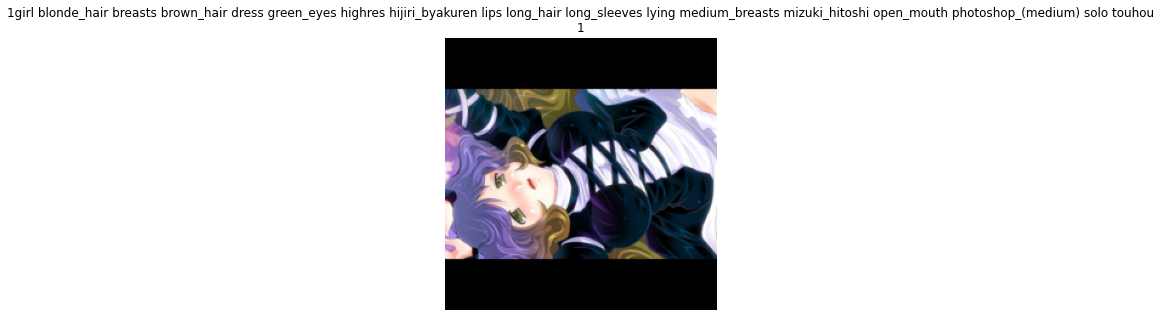

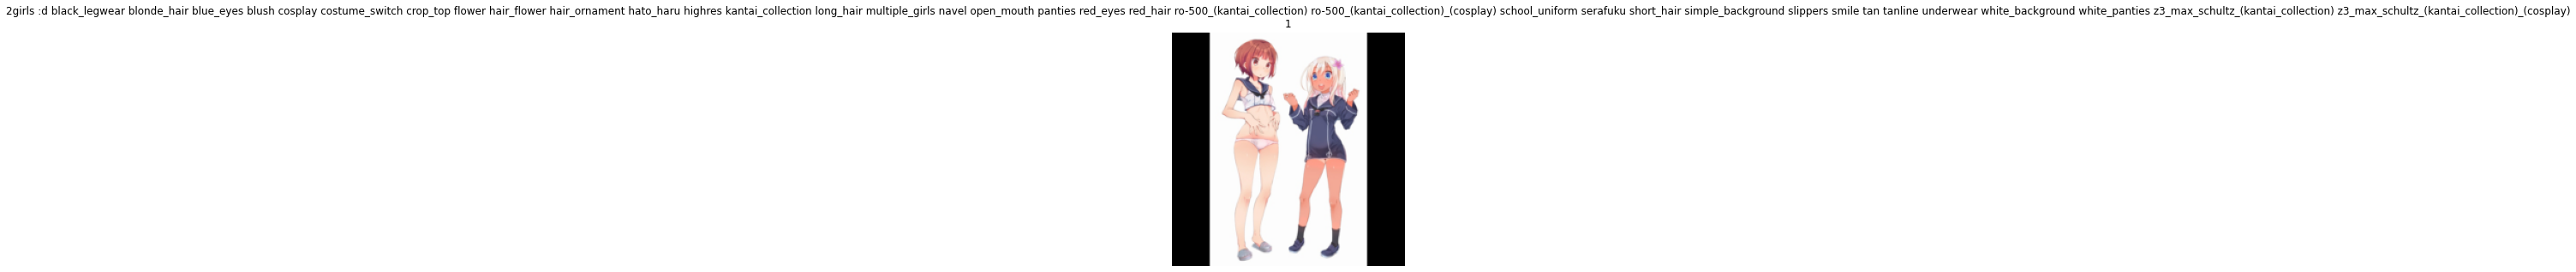

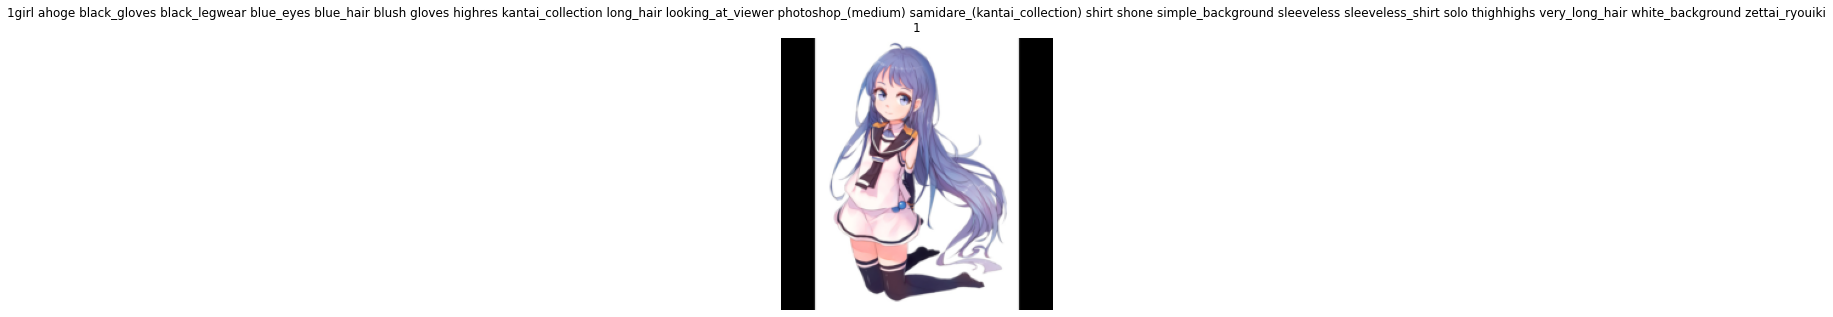

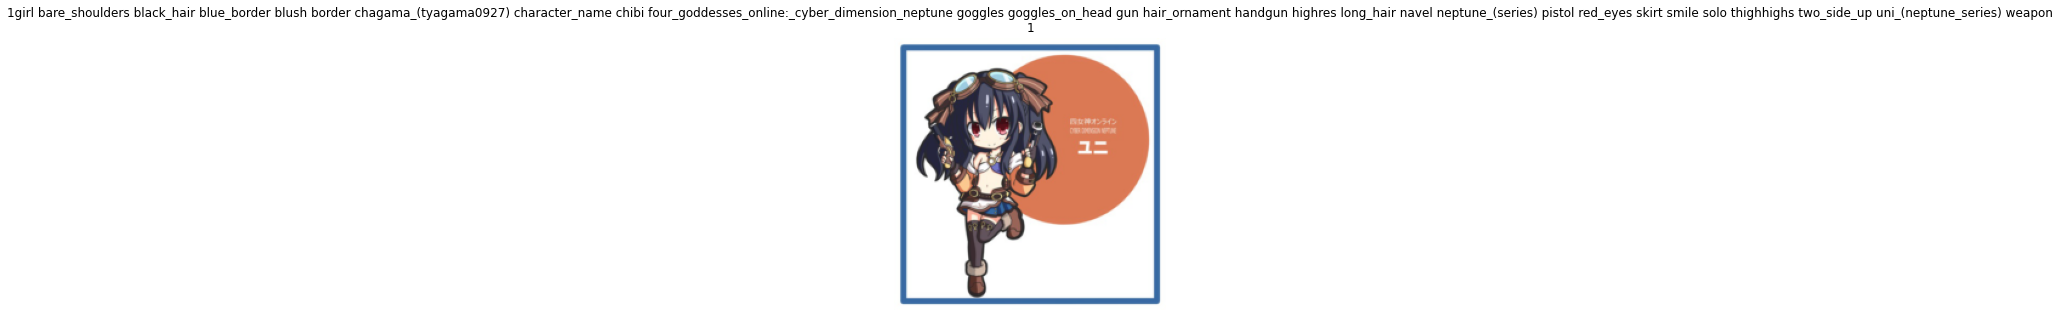

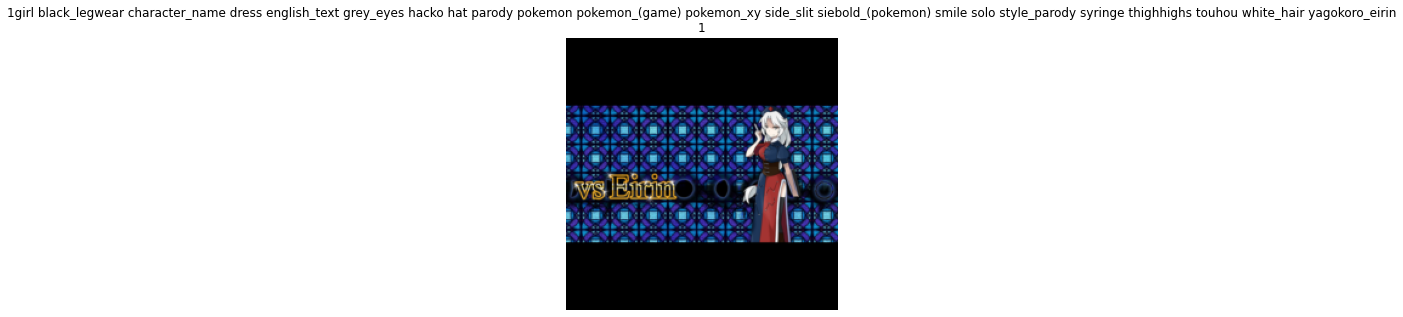

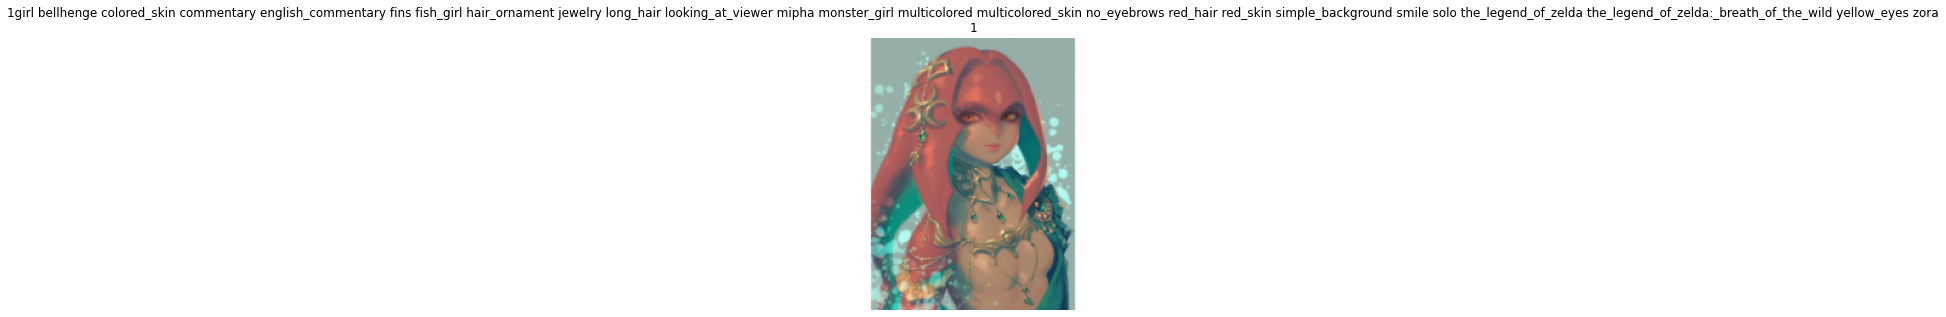

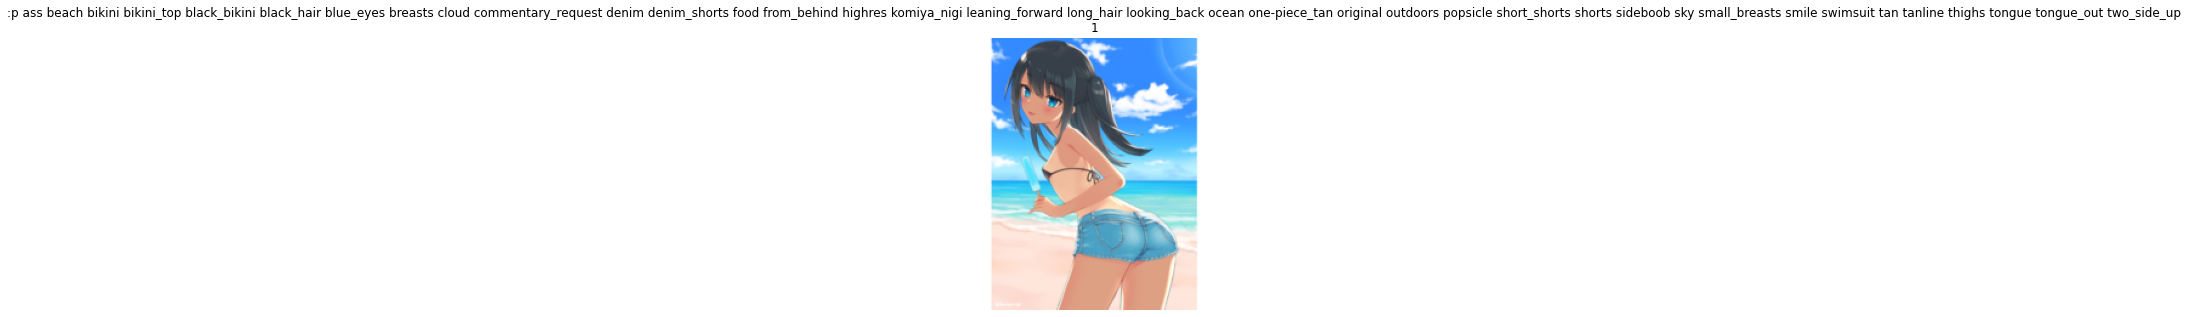

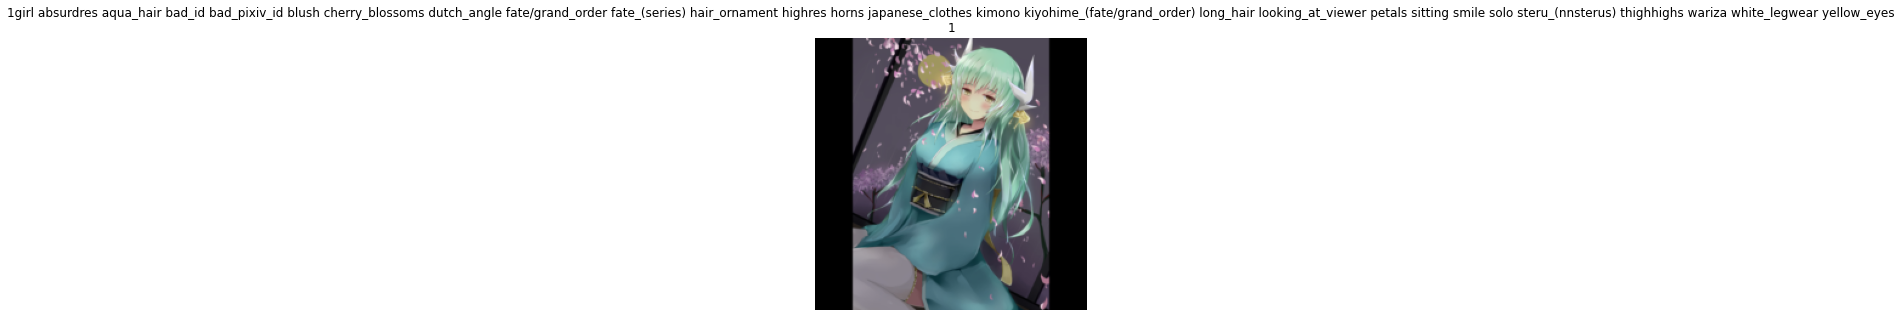

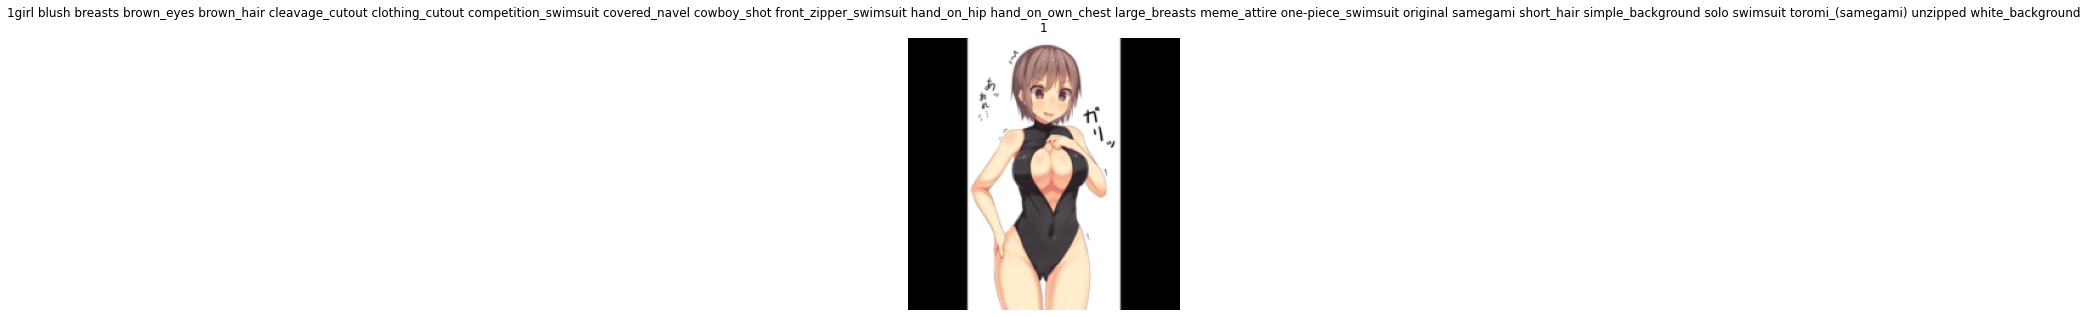

In [ ]:
dls.show_batch()

In [ ]:
%debug

> /home/molly/miniconda3/envs/fastai/lib/python3.8/site-packages/matplotlib/artist.py(996)update()
    994                     func = getattr(self, f"set_{k}", None)
    995                     if not callable(func):
--> 996                         raise AttributeError(f"{type(self).__name__!r} object "
    997                                              f"has no property {k!r}")
    998                     ret.append(func(v))

ipdb> up
> /home/molly/miniconda3/envs/fastai/lib/python3.8/site-packages/matplotlib/image.py(256)__init__()
    254         self._imcache = None
    255 
--> 256         self.update(kwargs)
    257 
    258     def __getstate__(self):

ipdb> up
> /home/molly/miniconda3/envs/fastai/lib/python3.8/site-packages/matplotlib/image.py(902)__init__()
    900         self._extent = extent
    901 
--> 902         super().__init__(
    903             ax,
    904             cmap=cmap,

ipdb> up
> /home/molly/miniconda3/envs/fastai/lib/python3.8/site-packages/matplotlib

Restart: 

In [ ]:
dls.vocab

In [ ]:
Numericalize??